<a href="https://colab.research.google.com/github/DanielKim0208/Data_driven/blob/main/8_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis

## Table of Contents

   
   [**Introduction**](#Intro1)

1. [**Data Cleaning & Wrangling**](#DWrang)

    1.1 [**Handling missing data**](#MissD)

    1.2 [**Checking and correcting data format**](#Dform)


2. [**Exporting Data**](#export)

   
3. [**Exploratory Data Analysis**](#EDA)

    3.1 [**Descriptive statistics & visualization**](#DSV)

    3.2 [**Grouping**](#Grouping)

    3.3 [**Correlation**](#Corr)

## Introduction <a name="Intro1"></a>

When we are given a data set, first step would be to get to know the data set, its features, and familiarize ourselves with the fields in the data set.

Then, we would focus on data cleaning and data wrangling. In __data cleaning__, we try to indetify missing or incorrect values and either remove them from the data set or replace them with meaningful values. In __data wrangling__, we convert the data from initial format to a format that may be better for analysis.

Data cleaning and wrangling can also inclue:
-  <u>Data normalization</u>: rescaling the values into a range of [0,1]
- <u>Data standardization</u>: rescaling data to have a mean of 0 and a standard deviation of 1
- <u>Binning</u>: Transformation of a continuous or numerical variable into a categorical feature
- <u>Introducing dummy variables</u>: Introducing a variable that takes values of 0 and 1, where the values indicate the presence or absence of something.


## 1. Data Cleaning & Wrangling <a name="DWrang"></a>

In this notebook, we are going to use Fuel Economy Data Set, which is produced by the Office of Energy Efficiency and Renewable Energy of the U.S. Department of Energy. Fuel economy data are the result of vehicle testing done at the Environmental Protection Agency's National Vehicle and Fuel Emissions Laboratory in Ann Arbor, Michigan, and by vehicle manufacturers with oversight by EPA. This data set can be accessed from here: https://raw.githubusercontent.com/MasoudMiM/ME_364/master/EPA_Green_Vehicle_Guide/Data1.xlsx and a description of the data is provided at this link: https://www.fueleconomy.gov/feg/EPAGreenGuide/GreenVehicleGuideDocumentation.pdf

In [ ]:
import pandas as pd

xlsx = pd.ExcelFile('https://raw.githubusercontent.com/MasoudMiM/ME_364/master/EPA_Green_Vehicle_Guide/Data1.xlsx')
df = pd.read_excel(xlsx, 'Sheet1')            # first sheet of the excel file

# Data set is now stored in a Pandas's Dataframe
df.head()

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Stnd,Stnd Description,Underhood ID,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay,Comb CO2,Dummy Column
0,ACURA ILX,2.4,4,AMS-8,2WD,Gasoline,CA,L3ULEV125,California LEV-III ULEV125,LHNXV02.4KH3,small car,3,24,34,28,6,No,316,316.0
1,ACURA ILX,2.4,4,AMS-8,2WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,LHNXV02.4KH3,small car,3,24,34,28,6,No,316,316.0
2,ACURA MDX,3,6,AMS-7,4WD,Gasoline,CA,L3ULEV125,California LEV-III ULEV125,LHNXV03.0ABC,small SUV,3,26,27,27,6,No,333,333.0
3,ACURA MDX,3,6,AMS-7,4WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,LHNXV03.0ABC,small SUV,3,26,27,27,6,No,333,333.0
4,ACURA MDX,3.5,6,SemiAuto-9,2WD,Gasoline,CA,L3ULEV125,California LEV-III ULEV125,LHNXV03.5PBM,small SUV,3,20,27,23,5,No,387,387.0


In [ ]:
# You can check the size of the data frame
df.shape

(2524, 19)

Once you import the data, you can rename the columns based on your preference. To do that, you can use the following method
```python
dataframe.rename(columns={Old Name:New Name}, inplace=True)
```
If you prefer not to change the original data frame, you can omit the `inplace=True` option and put the output of this command to a new data frame.

Let's change the name `Veh Class` to `Class`.

In [ ]:
df.rename(columns={'Veh Class':'Class'}, inplace=True)
df.head()

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Stnd,Stnd Description,Underhood ID,Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay,Comb CO2,Dummy Column
0,ACURA ILX,2.4,4,AMS-8,2WD,Gasoline,CA,L3ULEV125,California LEV-III ULEV125,LHNXV02.4KH3,small car,3,24,34,28,6,No,316,316.0
1,ACURA ILX,2.4,4,AMS-8,2WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,LHNXV02.4KH3,small car,3,24,34,28,6,No,316,316.0
2,ACURA MDX,3,6,AMS-7,4WD,Gasoline,CA,L3ULEV125,California LEV-III ULEV125,LHNXV03.0ABC,small SUV,3,26,27,27,6,No,333,333.0
3,ACURA MDX,3,6,AMS-7,4WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,LHNXV03.0ABC,small SUV,3,26,27,27,6,No,333,333.0
4,ACURA MDX,3.5,6,SemiAuto-9,2WD,Gasoline,CA,L3ULEV125,California LEV-III ULEV125,LHNXV03.5PBM,small SUV,3,20,27,23,5,No,387,387.0


##### <font color=red>__Question (1)__</font>:
Change the column named `Underhood ID` to `ID`, `Stnd Description` to `Description`, and `Cert Region` to `Region` in the fuel economy data set. Then show the first five rows of the data set with updated column names

In [ ]:
# In-Class Assignment

df.rename(columns={'Cert Region':'Region', 'Underhood ID':'ID', 'Stnd Description':'Description' }, inplace=True)
df.head()



,Model,Displ,Cyl,Trans,Drive,Fuel,Region,Stnd,Description,ID,Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay,Comb CO2,Dummy Column
0,ACURA ILX,2.4,4,AMS-8,2WD,Gasoline,CA,L3ULEV125,California LEV-III ULEV125,LHNXV02.4KH3,small car,3,24,34,28,6,No,316,316.0
1,ACURA ILX,2.4,4,AMS-8,2WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,LHNXV02.4KH3,small car,3,24,34,28,6,No,316,316.0
2,ACURA MDX,3,6,AMS-7,4WD,Gasoline,CA,L3ULEV125,California LEV-III ULEV125,LHNXV03.0ABC,small SUV,3,26,27,27,6,No,333,333.0
3,ACURA MDX,3,6,AMS-7,4WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,LHNXV03.0ABC,small SUV,3,26,27,27,6,No,333,333.0
4,ACURA MDX,3.5,6,SemiAuto-9,2WD,Gasoline,CA,L3ULEV125,California LEV-III ULEV125,LHNXV03.5PBM,small SUV,3,20,27,23,5,No,387,387.0


## 1.1 Handling missing data <a name="MissD"></a>

Most data sets and data gathered from real world have missing and/or incorrect values. Unless the data set is previously inspected carefully and cleaned from any of those, you should expect to have to deal with missing values.

Here are some of the pandas' methods that are useful:
```python
.isnull()   # Finds null values, including NaN in numeric arrays, None or NaN in object arrays, NaT in datetime like
.notnull()  # Finds where values are not missing (not null)
.value_counts() # Counts of unique values
.any() # Return whether any element is True, potentially over an axis (for a dataframe, axis should be given)
```

In [ ]:
df.isnull()  # The output is a boolean value indicating whether the value that is passed into the argument is in fact missing data.

,Model,Displ,Cyl,Trans,Drive,Fuel,Region,Stnd,Description,ID,Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay,Comb CO2,Dummy Column
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2519,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2520,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2521,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2522,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


Let's count the number of missing values in column `Fuel` of our data frame:

In [ ]:
df['Fuel'].isnull().value_counts()

False    2523
True        1
Name: Fuel, dtype: int64

##### <font color=red>__Question (2)__</font>:
Find the number of missing values in column `Region`, column `Displ`, and column `Cyl`.

In [ ]:
# In-Class Assignment
Region_empty_count = df['Region'].isnull().value_counts()
Disp_empty_count = df['Displ'].isnull().value_counts()
cyl_empty_count = df['Cyl'].isnull().value_counts()
display(Region_empty_count, Disp_empty_count, cyl_empty_count)

False    2523
True        1
Name: Region, dtype: int64

False    2443
True       81
Name: Displ, dtype: int64

False    2443
True       81
Name: Cyl, dtype: int64

Let's use a for-loop to find the number of missing values in each columns:

In [ ]:
missing_data=df.isnull()
for column in missing_data.columns:
    print(column)
    print(missing_data[column].value_counts())
    print("")

Model
False    2524
Name: Model, dtype: int64

Displ
False    2443
True       81
Name: Displ, dtype: int64

Cyl
False    2443
True       81
Name: Cyl, dtype: int64

Trans
False    2523
True        1
Name: Trans, dtype: int64

Drive
False    2524
Name: Drive, dtype: int64

Fuel
False    2523
True        1
Name: Fuel, dtype: int64

Region
False    2523
True        1
Name: Region, dtype: int64

Stnd
False    2523
True        1
Name: Stnd, dtype: int64

Description
False    2524
Name: Description, dtype: int64

ID
False    2524
Name: ID, dtype: int64

Class
False    2524
Name: Class, dtype: int64

Air Pollution Score
False    2524
Name: Air Pollution Score, dtype: int64

City MPG
False    2524
Name: City MPG, dtype: int64

Hwy MPG
False    2524
Name: Hwy MPG, dtype: int64

Cmb MPG
False    2524
Name: Cmb MPG, dtype: int64

Greenhouse Gas Score
False    2524
Name: Greenhouse Gas Score, dtype: int64

SmartWay
False    2524
Name: SmartWay, dtype: int64

Comb CO2
False    2524
Name: Comb CO2, 

Let's also find the rows with missing values.

In [ ]:
df[df.isnull().any(axis=1)]

,Model,Displ,Cyl,Trans,Drive,Fuel,Region,Stnd,Description,ID,Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay,Comb CO2,Dummy Column
39,ALFA ROMEO Giulia,2,4,Auto-8,2WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,LCRXJ02.05P2,midsize car,3,24,33,27,6,No,330,NaN
40,ALFA ROMEO Giulia,2.9,6,Auto-8,2WD,Gasoline,CA,L3ULEV125,California LEV-III ULEV125,LCRXJ02.95P0,midsize car,3,17,25,20,4,No,436,NaN
41,ALFA ROMEO Giulia,2.9,6,Auto-8,2WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,LCRXJ02.95P0,midsize car,3,17,25,20,4,No,436,NaN
42,ALFA ROMEO Giulia AWD,2,4,Auto-8,4WD,Gasoline,CA,L3ULEV125,California LEV-III ULEV125,LCRXJ02.05P2,midsize car,3,23,31,26,5,No,348,NaN
43,ALFA ROMEO Giulia AWD,2,4,Auto-8,4WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,LCRXJ02.05P2,midsize car,3,23,31,26,5,No,348,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2519,VOLVO XC90,2,4,SemiAuto-8,4WD,Gasoline,FA,T3B30,Federal Tier 3 Bin 30,LVVXJ02.0S30,standard SUV,7,18,26,21,4,No,429,NaN
2520,VOLVO XC90,2,4,SemiAuto-8,4WD,Gasoline,CA,L3ULEV70,California LEV-III ULEV70,LVVXJ02.0U70,standard SUV,5,20,27,23,5,No,387,NaN
2521,VOLVO XC90,2,4,SemiAuto-8,4WD,Gasoline,FA,T3B70,Federal Tier 3 Bin 70,LVVXJ02.0U70,standard SUV,5,20,27,23,5,No,387,NaN
2522,VOLVO XC90,2,4,SemiAuto-8,4WD,Gasoline/Electricity,CA,L3SULEV30,California LEV-III SULEV30,LVVXJ02.0P30,standard SUV,7,26/58,28/52,27/55,10,Elite,193,NaN


How about checking which columns have missing values?

In [ ]:
df.isnull().any(axis=0)

Model                   False
Displ                    True
Cyl                      True
Trans                    True
Drive                   False
Fuel                     True
Region                   True
Stnd                     True
Description             False
ID                      False
Class                   False
Air Pollution Score     False
City MPG                False
Hwy MPG                 False
Cmb MPG                 False
Greenhouse Gas Score    False
SmartWay                False
Comb CO2                False
Dummy Column             True
dtype: bool

##### <font color=red>__Question (3)__</font>:
Try to find the rows with missing values for the column `Trans`.

In [ ]:
# In-Class Assignment
df[df['Trans'].isnull()]


,Model,Displ,Cyl,Trans,Drive,Fuel,Region,Stnd,Description,ID,Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay,Comb CO2,Dummy Column
293,BMW M4,-,-,NaN,2WD,Gas,NaN,NaN,-,-,-,0,00,00,00,0,Yes,-,NaN


If you have missing values, there are multiple ways to deal with them. You can either __drop__ them or __replace__ them.

In case of droping, you might have to do either of these:
- droping the whole row
- droping the whole column

In case of replacing, you might want to do either of these:
- replacing the value by a reasonable guess
- replacing the value by mean
- replacing the value by another randomly selected value from that column
- replacing the value by interpolation
- replacing the value based on other functions

Here are some useful methods:
```python
.dropna()   # Remove missing values
.drop()     # Remove rows or columns by specifying label names and corresponding axis
.replace()  # Replaces a specific value with a given value
```



Looking at all the columns in our data frame, almost all the values in dummy column are `NaN` values. So we can safely remove this column.

In [ ]:
df.drop(columns='Dummy Column', inplace=True)
df.head()

,Model,Displ,Cyl,Trans,Drive,Fuel,Region,Stnd,Description,ID,Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay,Comb CO2
0,ACURA ILX,2.4,4,AMS-8,2WD,Gasoline,CA,L3ULEV125,California LEV-III ULEV125,LHNXV02.4KH3,small car,3,24,34,28,6,No,316
1,ACURA ILX,2.4,4,AMS-8,2WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,LHNXV02.4KH3,small car,3,24,34,28,6,No,316
2,ACURA MDX,3,6,AMS-7,4WD,Gasoline,CA,L3ULEV125,California LEV-III ULEV125,LHNXV03.0ABC,small SUV,3,26,27,27,6,No,333
3,ACURA MDX,3,6,AMS-7,4WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,LHNXV03.0ABC,small SUV,3,26,27,27,6,No,333
4,ACURA MDX,3.5,6,SemiAuto-9,2WD,Gasoline,CA,L3ULEV125,California LEV-III ULEV125,LHNXV03.5PBM,small SUV,3,20,27,23,5,No,387


Let's take a look at the percent missing values in the columns

In [ ]:
100*(df.isnull().sum())/len(df)

Model                   0.000000
Displ                   3.209192
Cyl                     3.209192
Trans                   0.039620
Drive                   0.000000
Fuel                    0.039620
Region                  0.039620
Stnd                    0.039620
Description             0.000000
ID                      0.000000
Class                   0.000000
Air Pollution Score     0.000000
City MPG                0.000000
Hwy MPG                 0.000000
Cmb MPG                 0.000000
Greenhouse Gas Score    0.000000
SmartWay                0.000000
Comb CO2                0.000000
dtype: float64

Columns `Displ` and `Cyl` have the most missing values. Let's look at the rows with missing values for those two columns.

In [ ]:
df[df['Displ'].isnull()]

,Model,Displ,Cyl,Trans,Drive,Fuel,Region,Stnd,Description,ID,Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay,Comb CO2
142,AUDI e-tron Sportback,NaN,NaN,Auto-1,4WD,Electricity,FA,T3B0,Federal Tier 3 Bin 0,LVGAT00.0AZE,standard SUV,10,76,78,77,10,Elite,0
143,AUDI e-tron Sportback,NaN,NaN,Auto-1,4WD,Electricity,CA,ZEV,California ZEV,LVGAT00.0AZE,standard SUV,10,76,78,77,10,Elite,0
385,BMW i3,NaN,NaN,Auto-1,2WD,Electricity,FA,T3B0,Federal Tier 3 Bin 0,LBMXV00.0I3B,small car,10,124,102,113,10,Elite,0
386,BMW i3,NaN,NaN,Auto-1,2WD,Electricity,CA,ZEV,California ZEV,LBMXV00.0I3B,small car,10,124,102,113,10,Elite,0
389,BMW i3s,NaN,NaN,Auto-1,2WD,Electricity,FA,T3B0,Federal Tier 3 Bin 0,LBMXV00.0I3B,small car,10,124,102,113,10,Elite,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2312,TESLA Model Y Long Range,NaN,NaN,Auto-1,4WD,Electricity,CA,ZEV,California ZEV,LTSLV00.0L2Y,small SUV,10,127,114,121,10,Elite,0
2313,TESLA Model Y Performance,NaN,NaN,Auto-1,4WD,Electricity,FA,T3B0,Federal Tier 3 Bin 0,LTSLV00.0L2Y,small SUV,10,129,112,121,10,Elite,0
2314,TESLA Model Y Performance,NaN,NaN,Auto-1,4WD,Electricity,CA,ZEV,California ZEV,LTSLV00.0L2Y,small SUV,10,129,112,121,10,Elite,0
2387,TOYOTA Mirai,NaN,NaN,CVT,2WD,Hydrogen,FA,T3B0,Federal Tier 3 Bin 0,LTYXV00.0DA7,small car,10,67,67,67,10,Elite,0


In [ ]:
df[df['Cyl'].isnull()]

,Model,Displ,Cyl,Trans,Drive,Fuel,Region,Stnd,Description,ID,Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay,Comb CO2
142,AUDI e-tron Sportback,NaN,NaN,Auto-1,4WD,Electricity,FA,T3B0,Federal Tier 3 Bin 0,LVGAT00.0AZE,standard SUV,10,76,78,77,10,Elite,0
143,AUDI e-tron Sportback,NaN,NaN,Auto-1,4WD,Electricity,CA,ZEV,California ZEV,LVGAT00.0AZE,standard SUV,10,76,78,77,10,Elite,0
385,BMW i3,NaN,NaN,Auto-1,2WD,Electricity,FA,T3B0,Federal Tier 3 Bin 0,LBMXV00.0I3B,small car,10,124,102,113,10,Elite,0
386,BMW i3,NaN,NaN,Auto-1,2WD,Electricity,CA,ZEV,California ZEV,LBMXV00.0I3B,small car,10,124,102,113,10,Elite,0
389,BMW i3s,NaN,NaN,Auto-1,2WD,Electricity,FA,T3B0,Federal Tier 3 Bin 0,LBMXV00.0I3B,small car,10,124,102,113,10,Elite,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2312,TESLA Model Y Long Range,NaN,NaN,Auto-1,4WD,Electricity,CA,ZEV,California ZEV,LTSLV00.0L2Y,small SUV,10,127,114,121,10,Elite,0
2313,TESLA Model Y Performance,NaN,NaN,Auto-1,4WD,Electricity,FA,T3B0,Federal Tier 3 Bin 0,LTSLV00.0L2Y,small SUV,10,129,112,121,10,Elite,0
2314,TESLA Model Y Performance,NaN,NaN,Auto-1,4WD,Electricity,CA,ZEV,California ZEV,LTSLV00.0L2Y,small SUV,10,129,112,121,10,Elite,0
2387,TOYOTA Mirai,NaN,NaN,CVT,2WD,Hydrogen,FA,T3B0,Federal Tier 3 Bin 0,LTYXV00.0DA7,small car,10,67,67,67,10,Elite,0


With a quick look, we can realize that those rows belong to electric cars and that's why they have no information regarding the number of engine cylinders (`Cyl`) and engine displacement in liters (`Disp`). That makes sense!

We are not going to look into fully electric or hydrogen vehicles. So let's just remove those rows from our data set. To do that, we can use <font color=blue> .dropna() </font> method. This method has multiple options:


`axis` determines if rows or columns, which contain missing values, should be removed. _possible values_: 0 or ‘index’, 1 or ‘columns’ (default 0)

`how` determines if row or column should be removed from DataFrame, when we have at least one NaN or all NaN. _possible values_: 'any' or 'all'

`subset`: Labels along other axis to consider, e.g. if you are dropping rows these would be a list of columns to include.

`inplace`: If True, do operation inplace and return None

In [ ]:
df['Fuel'].unique()

array(['Gasoline', 'Gasoline/Electricity', 'Electricity', 'Gas', 'Diesel',
       'Ethanol/Gas', nan, 'Hydrogen'], dtype=object)

In [ ]:
df = df[~df['Fuel'].isin(['Gasoline/Electricity','Electricity', 'Hydrogen'])]

Looking at the missing values in columns again

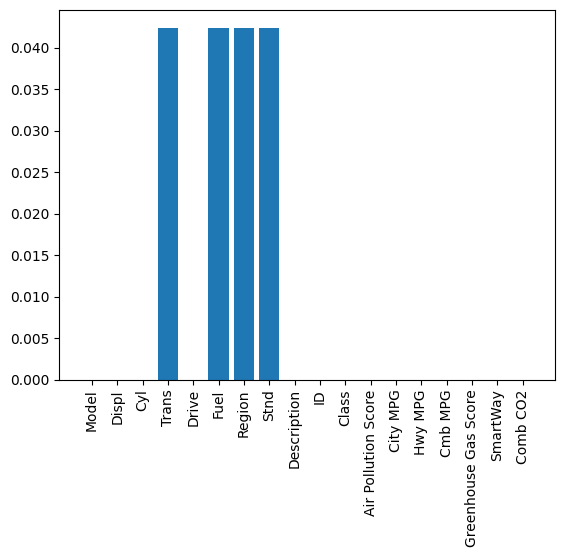

In [ ]:
import matplotlib.pyplot as plt
percent_missing = 100*(df.isnull().sum())/len(df)

plt.bar(percent_missing.keys(), percent_missing.values)
plt.xticks(rotation=90);

We still have three columns, `Fuel`, `Region`, `stnd`, and `Trans` with some null value for each.

In [ ]:
# For fuel column
df[df['Fuel'].isnull()]

,Model,Displ,Cyl,Trans,Drive,Fuel,Region,Stnd,Description,ID,Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay,Comb CO2
578,CHEVROLET Silverado 4WD Trail Boss,4.3,6,Auto-6,4WD,NaN,CA,L3ULEV50,California LEV-III ULEV50,LGMXT04.3186,pickup,6,14,18,16,2,No,556


From what we know, CHEVROLET Silverado 4WD Trail Boss uses Gasoline as fuel. You can actually check that using:

```python
df[df['Model'].str.contains('CHEVROLET' and 'Silverado')]
```

So we can fix the dataset by replacing the missing value with `Gasoline`

In [ ]:
import numpy as np   # We need numpy to use nan

df['Fuel'].replace(np.nan, 'Gasoline', inplace=True)

Let's check the row again and see if it is updated now

In [ ]:
df.loc[[578]]

,Model,Displ,Cyl,Trans,Drive,Fuel,Region,Stnd,Description,ID,Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay,Comb CO2
578,CHEVROLET Silverado 4WD Trail Boss,4.3,6,Auto-6,4WD,Gasoline,CA,L3ULEV50,California LEV-III ULEV50,LGMXT04.3186,pickup,6,14,18,16,2,No,556


Now, let's take a look at rows with missing values in other columns.

In [ ]:
# For Region column
df[df['Region'].isnull()]

,Model,Displ,Cyl,Trans,Drive,Fuel,Region,Stnd,Description,ID,Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay,Comb CO2
293,BMW M4,-,-,NaN,2WD,Gas,NaN,NaN,-,-,-,0,00,00,00,0,Yes,-


In [ ]:
# For Stnd column
df[df['Stnd'].isnull()]

,Model,Displ,Cyl,Trans,Drive,Fuel,Region,Stnd,Description,ID,Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay,Comb CO2
293,BMW M4,-,-,NaN,2WD,Gas,NaN,NaN,-,-,-,0,00,00,00,0,Yes,-


Since most of the data for this row is missing, we can just remove this row.

In [ ]:
df.drop(293, axis=0, inplace=True)
df[df['Region'].isnull()]

,Model,Displ,Cyl,Trans,Drive,Fuel,Region,Stnd,Description,ID,Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay,Comb CO2


At this point, there should not be any NaN value in our data set.

In [ ]:
df.isnull().isnull().sum().sum()

0

Finally, we need to reset the index values since we have removed multiple lines from the data set.

In [ ]:
df.reset_index(drop=True, inplace=True) # reset the index and drops the old index
df.head()

,Model,Displ,Cyl,Trans,Drive,Fuel,Region,Stnd,Description,ID,Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay,Comb CO2
0,ACURA ILX,2.4,4,AMS-8,2WD,Gasoline,CA,L3ULEV125,California LEV-III ULEV125,LHNXV02.4KH3,small car,3,24,34,28,6,No,316
1,ACURA ILX,2.4,4,AMS-8,2WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,LHNXV02.4KH3,small car,3,24,34,28,6,No,316
2,ACURA MDX,3,6,AMS-7,4WD,Gasoline,CA,L3ULEV125,California LEV-III ULEV125,LHNXV03.0ABC,small SUV,3,26,27,27,6,No,333
3,ACURA MDX,3,6,AMS-7,4WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,LHNXV03.0ABC,small SUV,3,26,27,27,6,No,333
4,ACURA MDX,3.5,6,SemiAuto-9,2WD,Gasoline,CA,L3ULEV125,California LEV-III ULEV125,LHNXV03.5PBM,small SUV,3,20,27,23,5,No,387


## 1.2 Checking and correcting data format <a name="Dform"></a>

Looking at the data set, we also need to check the data type for each column to make sure they correctly represent the data in that column. Here is a quick guideline for data types between Python, Numpy, and Pandas:

![alt text](https://docs.google.com/uc?export=download&id=1YOypE53ETQEUpOXTBU8HVbVtZphHnp-c)

To check the data types for all the columns, you can easily use:
```python
df.dtypes
```
and make sure that the column has the correct format considering the type of data it is representing.

In [ ]:
df.dtypes

Model                   object
Displ                   object
Cyl                     object
Trans                   object
Drive                   object
Fuel                    object
Region                  object
Stnd                    object
Description             object
ID                      object
Class                   object
Air Pollution Score      int64
City MPG                object
Hwy MPG                 object
Cmb MPG                 object
Greenhouse Gas Score    object
SmartWay                object
Comb CO2                object
dtype: object

If the data type is not correct, you can change it using <font color='blue'> .astype() </font> attribute.

In [ ]:
df['Displ']=df['Displ'].astype('float64')
df['Cyl']=df['Cyl'].astype('int64')

df['Class']=df['Class'].astype('category')
df['SmartWay']=df['SmartWay'].astype('category')
df['Region']=df['Region'].astype('category')
df['Trans']=df['Trans'].astype('category')
df['Drive']=df['Drive'].astype('category')

How about columns `City MPG`, `Hwy MPG`, `Cmb MPG`, and `Comb CO2` ? Let's try converting the format for the column `City MPG`.

In [ ]:
df['City MPG']=df['City MPG'].astype('int64')

ValueError: ignored

Oops! It seems like we have a problem!
Let's just see how many of these cars are running on more than one type of fuels.  

In [ ]:
df[ df['City MPG']=='14/18' ]

,Model,Displ,Cyl,Trans,Drive,Fuel,Region,Stnd,Description,ID,Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay,Comb CO2
496,CHEVROLET Impala,3.6,6,SemiAuto-6,2WD,Ethanol/Gas,CA,L3ULEV70,California LEV-III ULEV70,LGMXV03.6166,large car,5,14/18,20/28,16/22,4,No,396/411
497,CHEVROLET Impala,3.6,6,SemiAuto-6,2WD,Ethanol/Gas,FA,T3B70,Federal Tier 3 Bin 70,LGMXV03.6166,large car,5,14/18,20/28,16/22,4,No,396/411


In [ ]:
print( df['Fuel'].unique() )    # check to see the possible types of fuels

In [ ]:
print(df[df['Fuel']=='Ethanol/Gas'].shape)

The easiest way to proceed would be to just remove those cars from our data set since there are not too many of them. If we needed to consider them in our data, we would have to split these columns and create new columns from the character `/`. Take a look at this link to see how can you split a column into two columns by separating the values in that column: https://cmdlinetips.com/2018/11/how-to-split-a-text-column-in-pandas/

Here, we take the easy path and take them out of our data set.

In [ ]:
df=df[ df['Fuel']!='Ethanol/Gas' ]

Now, we can convert the formats for those columns.

In [ ]:
df['City MPG']=df['City MPG'].astype('int64')
df['Hwy MPG']=df['Hwy MPG'].astype('int64')
df['Cmb MPG']=df['Cmb MPG'].astype('int64')
df['Comb CO2']=df['Comb CO2'].astype('int64')
df['Greenhouse Gas Score']=df['Greenhouse Gas Score'].astype('int64')

ValueError: ignored

Hah! seems like we have another problem. There is at least one cell in `Greenhouse Gas Score` column with character `-` instead of a number. Let's find that row or rows.

In [ ]:
df[ df['Greenhouse Gas Score']=='-' ]

,Model,Displ,Cyl,Trans,Drive,Fuel,Region,Stnd,Description,ID,Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay,Comb CO2
13,ACURA RDX,2.0,4,SemiAuto-10,2WD,Gasoline,FA,T3B50,Federal Tier 3 Bin 50,LHNXT02.08VC,small SUV,6,22,28,24,-,No,370


To get an estimate about what number we should use for the `Greenhouse Gas Score` for `ACURA RDX`, let's see if we can find some information about this car from the data frame that can help.

In [ ]:
df[ df['Model']=='ACURA RDX' ]

,Model,Displ,Cyl,Trans,Drive,Fuel,Region,Stnd,Description,ID,Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay,Comb CO2
12,ACURA RDX,2.0,4,SemiAuto-10,2WD,Gasoline,CA,L3ULEV50,California LEV-III ULEV50,LHNXT02.08VC,small SUV,6,22,28,24,5,No,370
13,ACURA RDX,2.0,4,SemiAuto-10,2WD,Gasoline,FA,T3B50,Federal Tier 3 Bin 50,LHNXT02.08VC,small SUV,6,22,28,24,-,No,370
14,ACURA RDX,2.0,4,SemiAuto-10,4WD,Gasoline,CA,L3ULEV50,California LEV-III ULEV50,LHNXT02.08VC,small SUV,6,21,27,23,5,No,385
15,ACURA RDX,2.0,4,SemiAuto-10,4WD,Gasoline,FA,T3B50,Federal Tier 3 Bin 50,LHNXT02.08VC,small SUV,6,21,27,23,5,No,385


Looking at the above results, we can safely replace the character `-` with Greenhouse Gas Score of 5. So let's do that.

In [ ]:
df['Greenhouse Gas Score'].replace(to_replace='-', value=5, inplace=True)

In [ ]:
df['Greenhouse Gas Score']=df['Greenhouse Gas Score'].astype('int64')

In [ ]:
df.dtypes

Model                     object
Displ                    float64
Cyl                        int64
Trans                   category
Drive                   category
Fuel                      object
Region                  category
Stnd                      object
Description               object
ID                        object
Class                   category
Air Pollution Score        int64
City MPG                   int64
Hwy MPG                    int64
Cmb MPG                    int64
Greenhouse Gas Score       int64
SmartWay                category
Comb CO2                   int64
dtype: object

In [ ]:
df.reset_index(drop=True,inplace=True) # reset the index and drops the old index
df.head()

,Model,Displ,Cyl,Trans,Drive,Fuel,Region,Stnd,Description,ID,Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay,Comb CO2
0,ACURA ILX,2.4,4,AMS-8,2WD,Gasoline,CA,L3ULEV125,California LEV-III ULEV125,LHNXV02.4KH3,small car,3,24,34,28,6,No,316
1,ACURA ILX,2.4,4,AMS-8,2WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,LHNXV02.4KH3,small car,3,24,34,28,6,No,316
2,ACURA MDX,3.0,6,AMS-7,4WD,Gasoline,CA,L3ULEV125,California LEV-III ULEV125,LHNXV03.0ABC,small SUV,3,26,27,27,6,No,333
3,ACURA MDX,3.0,6,AMS-7,4WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,LHNXV03.0ABC,small SUV,3,26,27,27,6,No,333
4,ACURA MDX,3.5,6,SemiAuto-9,2WD,Gasoline,CA,L3ULEV125,California LEV-III ULEV125,LHNXV03.5PBM,small SUV,3,20,27,23,5,No,387


## 2. Exporting Data <a name="export"></a>

Typically, we do not need to export the data from notbook environment and can continue our data analysis in the same notebook. However, there might be several reasons for exporting the data, including the use of a more efficiet binary format such as Pickle, HDF5, or Parquet. Here is a link to a post about these formats and how they differ based on memory usage and loading/saving time: https://towardsdatascience.com/the-best-format-to-save-pandas-data-414dca023e0d

Pandas support different types of file formats and once you are done cleaning and re-arranging your data set, you can export your data using any of pandas commands.

![alt text](https://docs.google.com/uc?export=download&id=1JQ7LPiEDnfu_biI7mdfX1rkRalCd31e4)



If you want to export your data frame as a csv file, use:

In [ ]:
df.to_csv('EPA_2020_Fuel_Economy.csv')

from google.colab import files
files.download('EPA_2020_Fuel_Economy.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

You can also export it as an excel file using:


In [ ]:
df.to_excel('EPA_2020_Fuel_Economy.xlsx', sheet_name='FirstSheet')

from google.colab import files
files.download('EPA_2020_Fuel_Economy.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## 3.1 Descriptive statistics & visualization <a name="DSV"></a>

We look at the basic statistics of each column. The five-number summary is a great start for numerical values:

- The sample minimum (smallest observation)

- The lower quartile or first quartile

- The median (the middle value)

- The upper quartile or third quartile

- The sample maximum (largest observation)

To get summary statistics using Pandas for the whole data frame, we can use `.desrcibe()` method. This method automatically skips variables of type object.

In [ ]:
df.describe()

,Displ,Cyl,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,Comb CO2
count,2308.000000,2308.000000,2308.000000,2308.000000,2308.000000,2308.000000,2308.000000,2308.000000
mean,3.064688,5.558925,4.585355,20.969671,27.721404,23.494367,4.613085,402.177643
std,1.298506,1.850384,1.737945,6.363701,6.170594,6.217797,1.699012,96.218810
min,1.000000,3.000000,1.000000,9.000000,13.000000,10.000000,1.000000,154.000000
25%,2.000000,4.000000,3.000000,17.000000,24.000000,19.000000,3.000000,336.000000
50%,3.000000,6.000000,5.000000,20.000000,27.000000,23.000000,5.000000,394.000000
75%,3.600000,6.000000,6.000000,23.000000,31.000000,26.000000,5.000000,459.250000
max,8.000000,16.000000,7.000000,58.000000,59.000000,58.000000,10.000000,864.000000


We can apply the method "describe" on the variables of type 'category' as follows:

In [ ]:
df.describe(include='category')  # you can switch to 'all' to include every column

,Trans,Drive,Region,Class,SmartWay
count,2308,2308,2308,2308,2308
unique,27,2,2,9,3
top,SemiAuto-8,2WD,CA,small car,No
freq,595,1219,1156,707,2046


`value_counts` is a good way of understanding how many units of each characteristic/variable we have. We can apply the `.value_counts()` on any given column. This method returns the counts of unique values.

In [ ]:
df['SmartWay'].value_counts()   # Try this one as well: df['Region'].value_counts()

No       2046
Yes       232
Elite      30
Name: SmartWay, dtype: int64

You can convert the output to a Dataframe using

In [ ]:
df_Fuel = df['Fuel'].value_counts().to_frame()
df_Fuel

<font color='red'>__Question (4)__</font>: Using the data set we have, find the number of unique values of engine capacity (engine displacement) for all the cars in this dataframe and put the outcomes into a new dataframe.

In [ ]:
# In-Class Assignment
df_engine = df['Displ'].value_counts().to_frame()
display(df_engine)


,Displ
2.0,597
3.0,334
3.5,156
2.5,140
4.0,119
3.6,102
1.5,92
2.4,71
5.3,60
5.0,54


Now, let's take a look at some examples of how can we use visualization to explore our dataset.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Let's find the scatterplot of engine capacity and greenhouse gas score.

<Axes: xlabel='Displ', ylabel='Greenhouse Gas Score'>

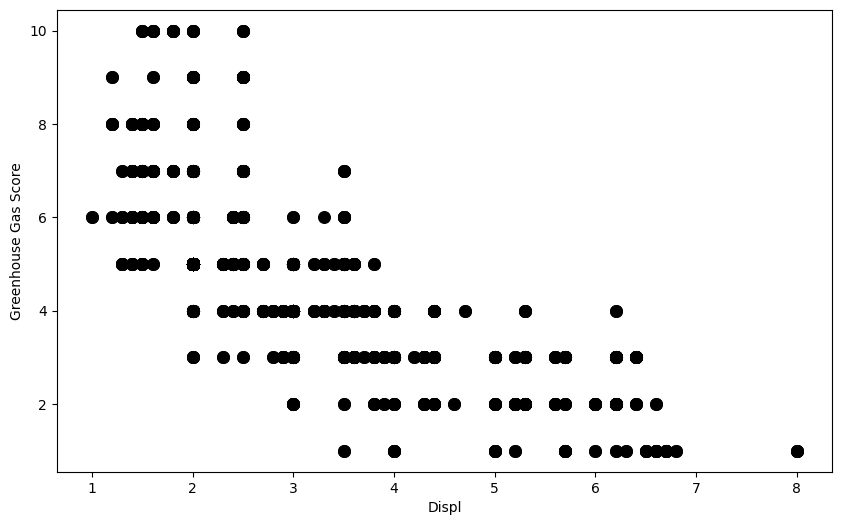

In [ ]:
df.plot(kind='scatter',x='Displ',y='Greenhouse Gas Score',figsize=(10,6),s=70,c='k')

How about city mpg and greenhouse score

<Axes: xlabel='City MPG', ylabel='Greenhouse Gas Score'>

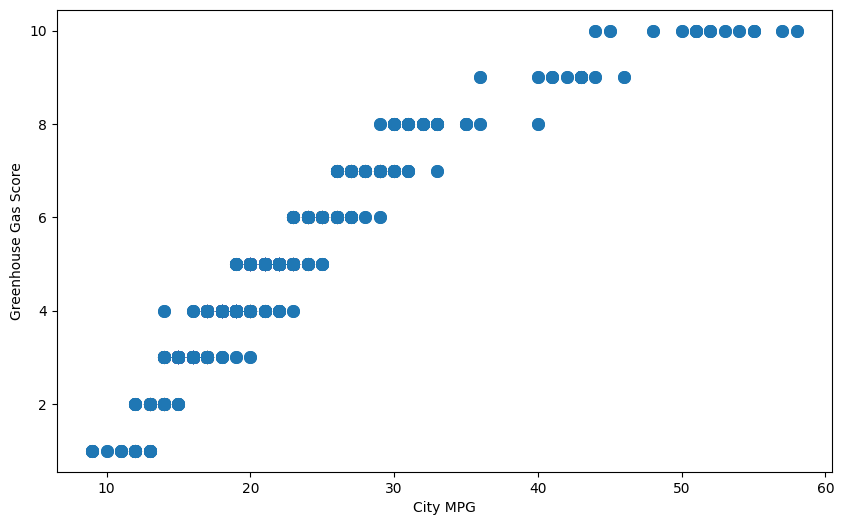

In [ ]:
df.plot(kind='scatter',x='City MPG',y='Greenhouse Gas Score',figsize=(10,6),s=70)

We can also use `.regplot` from seaborn to create a scatter plot and fit a linear regression line.

<Axes: xlabel='City MPG', ylabel='Greenhouse Gas Score'>

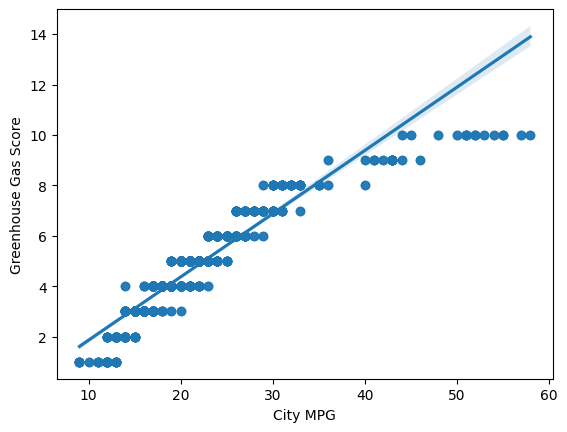

In [ ]:
sns.regplot(data=df, x='City MPG', y='Greenhouse Gas Score') # use option fit_reg=False if you don't want to see the line fit

<font color='red'>__Question (5)__</font>: Plot a scatter plot for city mpg and combined city/highway CO$_2$ tailpipe emissions. Do you see a strong or a weak linear relationship?




<Axes: xlabel='City MPG', ylabel='Comb CO2'>

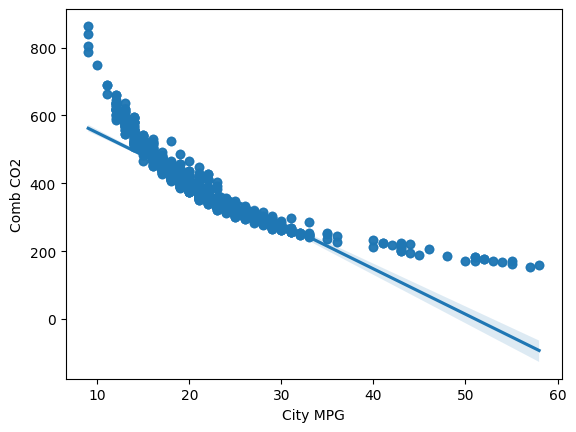

In [ ]:
# In-Class Assignment
df.head(0)
sns.regplot(data=df, x='City MPG', y='Comb CO2') # use option fit_reg=False if you don't want to see the line fit

# I see a weak linear relationship(polynomial relationship present)

For categorical variables, we can use box plots. Let's take a look at the distribution of greenhouse gas score between vehicles with different types of drive.

<Axes: xlabel='Drive', ylabel='Greenhouse Gas Score'>

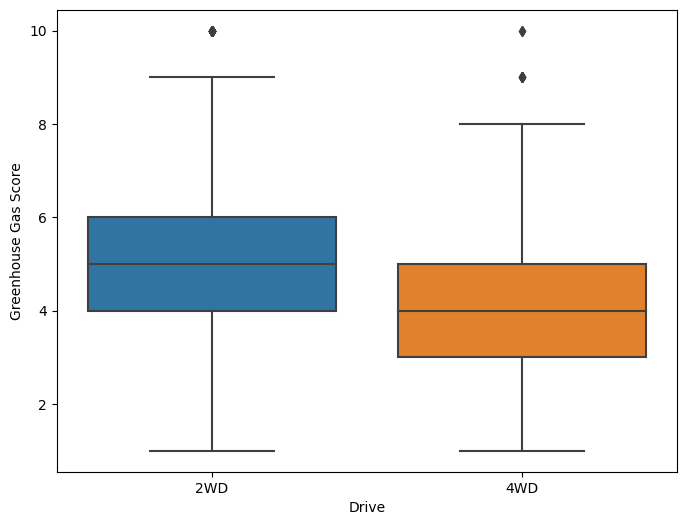

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Drive', y='Greenhouse Gas Score', data=df)

We see some 4WD cars that are outliers with high greenhouse scores. Let's see what are these cars

In [ ]:
df_4WD=df[ df['Drive']=='4WD' ]
df_4WD_GH=df_4WD[ df_4WD['Greenhouse Gas Score']>8.5 ]
df_4WD_GH

,Model,Displ,Cyl,Trans,Drive,Fuel,Region,Stnd,Description,ID,Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay,Comb CO2
689,FORD Escape HEV,2.5,4,CVT,4WD,Gasoline,CA,L3SULEV30,California LEV-III SULEV30,LFMXT02.52F1,small SUV,7,43,37,40,9,Yes,224
690,FORD Escape HEV,2.5,4,CVT,4WD,Gasoline,FA,T3B30,Federal Tier 3 Bin 30,LFMXT02.52F1,small SUV,7,43,37,40,9,Yes,224
1472,LEXUS UX 250h,2.0,4,SCV-6,4WD,Gasoline,CA,L3ULEV50,California LEV-III ULEV50,LTYXV02.0N4C,small car,6,41,38,39,9,Yes,225
1473,LEXUS UX 250h,2.0,4,SCV-6,4WD,Gasoline,FA,T3B50,Federal Tier 3 Bin 50,LTYXV02.0N4C,small car,6,41,38,39,9,Yes,225
2187,TOYOTA Prius,1.8,4,CVT,4WD,Gasoline,CA,L3SULEV30,California LEV-III SULEV30,LTYXV01.8P33,midsize car,7,52,48,50,10,Elite,176
2188,TOYOTA Prius,1.8,4,CVT,4WD,Gasoline,FA,T3B30,Federal Tier 3 Bin 30,LTYXV01.8P33,midsize car,7,52,48,50,10,Elite,176
2199,TOYOTA RAV4 Hybrid,2.5,4,SCV-6,4WD,Gasoline,CA,L3SULEV30,California LEV-III SULEV30,LTYXT02.5P3N,small SUV,7,41,38,40,9,Yes,223
2200,TOYOTA RAV4 Hybrid,2.5,4,SCV-6,4WD,Gasoline,FA,T3B30,Federal Tier 3 Bin 30,LTYXT02.5P3N,small SUV,7,41,38,40,9,Yes,223


<font color='red'>__Question (6)__</font>: Use boxplot to find out which class or classes of `TOYOTA` has the highest median greenhouse gas score.

<Axes: xlabel='Class', ylabel='Greenhouse Gas Score'>

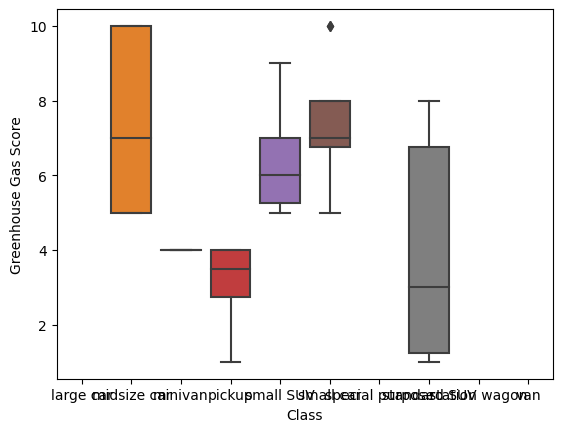

In [ ]:
# In-Class Assignment
df_toyota = df[df["Model"].str.contains("TOYOTA")]
sns.boxplot(x='Class', y='Greenhouse Gas Score', data=df_toyota)

We can also look at the distribution of greenhouse gas score values in this dataset using either `hist` plot or `displot`.

Text(0.5, 0, 'Greenhouse gas score')

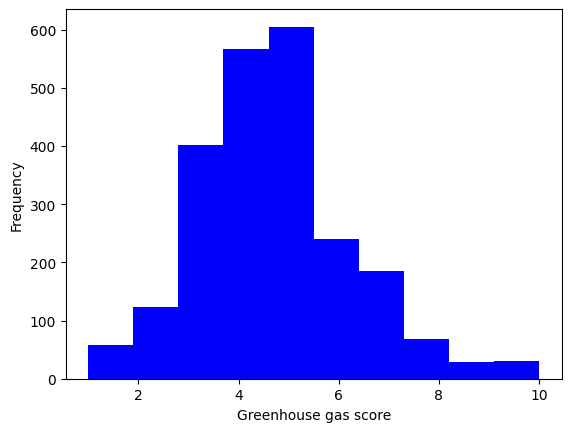

In [ ]:
df['Greenhouse Gas Score'].plot(kind='hist', bins=10, color='blue')
plt.xlabel('Greenhouse gas score')

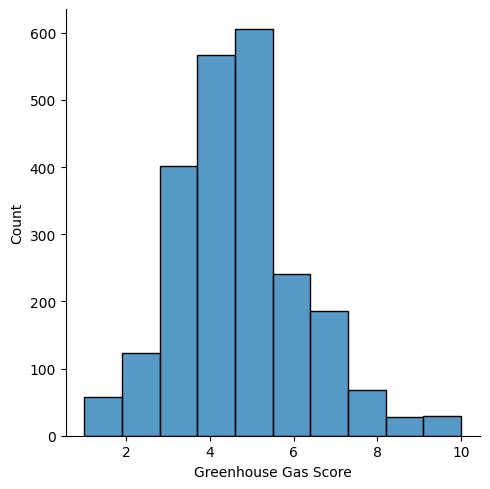

In [ ]:
sns.displot(data=df, x='Greenhouse Gas Score', bins=10)

## 3.2 Grouping <a name="Grouping"></a>


Before we try this method, let's create a new dataframe using some columns from `df` dataframe.

In [ ]:
df2=df[['Trans','City MPG','Hwy MPG','Air Pollution Score']]
df2.head()

,Trans,City MPG,Hwy MPG,Air Pollution Score
0,AMS-8,24,34,3
1,AMS-8,24,34,3
2,AMS-7,26,27,3
3,AMS-7,26,27,3
4,SemiAuto-9,20,27,3


If we want to know what is the average air pollution score for each transmission, we can group by `Trans` and then average them.

In [ ]:
df2.groupby('Trans', as_index=False).mean()

,Trans,City MPG,Hwy MPG,Air Pollution Score
0,AMS-6,37.000000,42.333333,5.666667
1,AMS-7,19.858268,26.472441,3.834646
2,AMS-8,17.714286,24.892857,4.071429
3,AMS-9,21.000000,22.000000,3.000000
4,Auto-10,16.333333,22.750000,2.916667
5,Auto-4,19.000000,25.000000,3.000000
6,Auto-6,17.191489,23.212766,4.574468
7,Auto-7,19.500000,25.500000,4.600000
8,Auto-8,17.494505,23.945055,3.571429
9,Auto-9,19.495455,26.790909,5.127273


When we split, (i.e., applying `groupby` method) the outcome is a _DataFrameGroupBy_ object under the hood.

In [ ]:
df2.groupby('Trans',as_index=False)

After splitting the data one of the common “apply” steps is to summarize or aggregate the data in some fashion, like mean, sum or median for each group.
```python
df2.groupby('Trans',as_index=False).mean()
```

In addition, pandas allow us query the grouped object for each query. For that, we use `.get_group()` method.

In [ ]:
df2.groupby('Trans', as_index=False).get_group('SemiAuto-10') # This is equivalent to df2[df2['Trans']=='SemiAuto-10']


,Trans,City MPG,Hwy MPG,Air Pollution Score
12,SemiAuto-10,22,28,6
13,SemiAuto-10,22,28,6
14,SemiAuto-10,21,27,6
15,SemiAuto-10,21,27,6
16,SemiAuto-10,22,27,6
...,...,...,...,...
2060,SemiAuto-10,11,15,3
2061,SemiAuto-10,11,15,3
2062,SemiAuto-10,11,15,3
2065,SemiAuto-10,12,18,3


<font color='red'>__Question (7)__</font>: We want to find out the median City MPG, median Hwy MPG, and median greenhouse gas score for different class of cars.

- Create a new dataframe only including columns `Class`, `City MPG`, `Hwy MPG`, and `Greenhouse Gas Score`.

- Using `groupby` and aggregation method `.median()` (i.e., split-apply-combine), find the answer to this question.  

In [ ]:
# In-Class Assignment
new_df = df[['Class', 'City MPG', 'Hwy MPG', 'Greenhouse Gas Score']]
new_df.head()
result = new_df.groupby('Class')[['City MPG', 'Hwy MPG', 'Greenhouse Gas Score']].median()
display(result)


,City MPG,Hwy MPG,Greenhouse Gas Score
Class,,,
large car,18.0,26.0,4.0
midsize car,23.0,31.0,5.0
minivan,19.0,26.0,4.0
pickup,17.0,22.0,3.0
small SUV,21.0,28.0,5.0
small car,20.0,28.0,5.0
special purpose,20.0,24.0,4.0
standard SUV,16.0,22.0,3.0
station wagon,24.0,31.0,6.0


We can group the data using two variables, instead of just one. For example, let's group by both `Class` and `Trans`. This groups the dataframe by the unique combinations of these two variables. We can store the results in a new dataframe.

In [ ]:
df_gp = df[['Class','Trans','Greenhouse Gas Score']]
df_grouped = df_gp.groupby(['Class','Trans'],as_index=False).mean()
df_grouped

,Class,Trans,Greenhouse Gas Score
0,large car,AMS-6,10.000000
1,large car,AMS-7,6.000000
2,large car,AMS-8,3.833333
3,large car,AMS-9,NaN
4,large car,Auto-10,NaN
...,...,...,...
265,van,SemiAuto-5,NaN
266,van,SemiAuto-6,NaN
267,van,SemiAuto-7,NaN
268,van,SemiAuto-8,NaN


This grouped data is much easier to visualize when it is made into a pivot table. A pivot table is like an Excel spreadsheet, with one variable along the column and another along the row. We can convert the dataframe to a pivot table using the method `.pivot` to create a pivot table from the groups.

In this case, we will leave the `Trans` variable as the rows of the table, and pivot `Class` to become the columns of the table:

In [ ]:
grouped_pivot = df_grouped.pivot(index='Trans', columns='Class')
grouped_pivot

Often, we won't have data for some of the pivot cells. We can fill these missing cells with the value 0, but any other value could potentially be used as well, depending on how we want to deal with the missing values (look at section 2.1 in this notebook). In case you want to fill all the missing values with 0:

In [ ]:
grouped_pivot = grouped_pivot.fillna(0) #fill missing values with 0
grouped_pivot.head()

There is more into `.fillna` method. You can see other capabilities of `.fillna` here: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html

One can also use the grouped objects to do some __transformation__ or __filter__ each group based on some condition: https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html

## 3.3 Correlation <a name="Corr"></a>

Suppose we are given two variables $x$ and $y$. We say $x$ and $y$ are __correlated__ when the value of $x$ has some prediction power on the value of $y$.

The __correlation coefficient__ $r(X,Y)$ is a statistic that measures the degree to which $Y$ is a function of $X$. This value ranges from -1 to 1. The most common method that is used to measure correlation is __Pearson__ correlation.

The __Pearson Correlation__ shows the linear relationship between two sets of data. In simple terms, it answers the question, "Can I draw a line graph to represent the data?" .

The resulting coefficient is a value between -1 and 1 inclusive, where:

- __1__ : Fully correlated
- __0__ : No relation
- __-1__: Anti-correlated


To find the Pearson correlation coefficient, we can use method `.corr` in Pandas. It computes pairwise correlation of columns, excluding NA/null values

In [ ]:
df.corr()

We also need to know if our findings are statistically significant. We use the __p-value__ as a threshhold to determine if the statistic meets the criteria ($\alpha$) for significance.

__p < 0.01__: we are 99% certain that the finding is accurate

__p < 0.05__: we are 95% certain that the finding is accurate

__p < 0.1__ : we are 90% certain that the finding is accurate

and etc


To find the p-value, we use the <font color='blue'>stats</font> module from <font color='blue'> scipy </font> library

In [ ]:
from scipy import stats

In [ ]:
pearson_coef, p_value = stats.pearsonr(df['Hwy MPG'], df['Greenhouse Gas Score'])
print(f"The Pearson Correlation Coefficient is {pearson_coef:0.3f} with a P-value of P = {p_value}")

So since the p-value is < 0.001, we are nearly 100% confident that there is a strong positive relationship between highway miles per gallon and greenhouse gas score.

In [ ]:
pearson_coef, p_value = stats.pearsonr(df['Displ'], df['Air Pollution Score'])
print(f"The Pearson Correlation Coefficient is {pearson_coef} with a P-value of P = {p_value}")

So since the p-value is < 0.001, we are nearly 100% confident that there is a weak negative relationship between engine capacity and air pollution score.

__Keep in mind__, <font color='purple'>__correlation does not imply causation!__</font>
- Correlation: There is a relationship between $x$ and $y$
- Causation  : $y$ is influenced by a change in $x$